# Investigating The Movie Database Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set includes a list of movies and their ratings from the year 1960 to 2015 as collected from The Movie Database(TMDb). The data includes information on the release date, release year, directors, cast, popularity, genre, revenue and budget, amongst other line items.

I will be analyzing this data to generate insights, particularly focusing on the questions below:
>1. Are there specific months that generate the highest movie ratings?
>2. What movie genres received the highest average rating?

My approach takes into account the steps of data analysis.

To begin, I will import the packages that I shall be using in my analysis

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px

<a id='wrangling'></a>
## Data Wrangling

This section will involve loading and assessing the data, then trimming and cleaning the dataset for analysis. 

### General Properties

(a) Loading the dataset

In [62]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


(b) Checking the size of the data set in terms of rows and columns

In [63]:
df.shape

(10866, 21)

(c) Checking the data types and number of non-null values per column, and also getting a quick overview of whether any values are missing 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(d) Checking for the total number of missing values

In [65]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

(e) Checking the number of unique values in the dataset per column

In [66]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

(f) Checking the descriptive statistics of the data, rounded to 4 decimal places

In [67]:
np.round(df.describe(), decimals=4)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.0000,10866.0000,1.086600e+04,1.086600e+04,10866.0000,10866.0000,10866.0000,10866.0000,1.086600e+04,1.086600e+04
mean,66064.1774,0.6464,1.462570e+07,3.982332e+07,102.0709,217.3897,5.9749,2001.3227,1.755104e+07,5.136436e+07
std,92130.1366,1.0002,3.091321e+07,1.170035e+08,31.3814,575.6191,0.9351,12.8129,3.430616e+07,1.446325e+08
min,5.0000,0.0001,0.000000e+00,0.000000e+00,0.0000,10.0000,1.5000,1960.0000,0.000000e+00,0.000000e+00
25%,10596.2500,0.2076,0.000000e+00,0.000000e+00,90.0000,17.0000,5.4000,1995.0000,0.000000e+00,0.000000e+00
50%,20669.0000,0.3839,0.000000e+00,0.000000e+00,99.0000,38.0000,6.0000,2006.0000,0.000000e+00,0.000000e+00
75%,75610.0000,0.7138,1.500000e+07,2.400000e+07,111.0000,145.7500,6.6000,2011.0000,2.085325e+07,3.369710e+07
max,417859.0000,32.9858,4.250000e+08,2.781506e+09,900.0000,9767.0000,9.2000,2015.0000,4.250000e+08,2.827124e+09


(g) Checking the correlation between two data variables, rounded to 4 decimal places

In [68]:
np.round(df.corr(), decimals=4)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.0000,-0.0143,-0.1414,-0.0992,-0.0884,-0.0356,-0.0584,0.5114,-0.1890,-0.1385
popularity,-0.0143,1.0000,0.5455,0.6634,0.1390,0.8008,0.2095,0.0898,0.5136,0.6091
budget,-0.1414,0.5455,1.0000,0.7349,0.1913,0.6327,0.0810,0.1159,0.9690,0.6225
revenue,-0.0992,0.6634,0.7349,1.0000,0.1628,0.7912,0.1726,0.0570,0.7064,0.9191
runtime,-0.0884,0.1390,0.1913,0.1628,1.0000,0.1633,0.1568,-0.1172,0.2211,0.1757
vote_count,-0.0356,0.8008,0.6327,0.7912,0.1633,1.0000,0.2538,0.1079,0.5871,0.7079
vote_average,-0.0584,0.2095,0.0810,0.1726,0.1568,0.2538,1.0000,-0.1176,0.0930,0.1931
release_year,0.5114,0.0898,0.1159,0.0570,-0.1172,0.1079,-0.1176,1.0000,0.0168,-0.0663
budget_adj,-0.1890,0.5136,0.9690,0.7064,0.2211,0.5871,0.0930,0.0168,1.0000,0.6466
revenue_adj,-0.1385,0.6091,0.6225,0.9191,0.1757,0.7079,0.1931,-0.0663,0.6466,1.0000


### Data Cleaning 
In this section, I shall clean the data. I will check if the data has any duplicated values and/or incorrect data types. I will also add and remove any columns that may or may not be relevant to my analysis.

(a) Checking for any duplicate values

In [69]:
df.duplicated().sum()

1

(b) Deleting the duplicated value

In [70]:
df.drop_duplicates(inplace=True)

(c) Correcting the data type under release date

In [71]:
df['release_date'] = pd.to_datetime(df['release_date'])

(d) Creating a new column that converts the release dates into months

In [72]:
df['release_month'] = df['release_date'].dt.month_name()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April


(e) Deleting columns that may be irrelevant to my analysis

In [73]:
new = df.drop(columns=['id', 'director', 'homepage', 'tagline', 'keywords', 'overview'])

In [74]:
new

,imdb_id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,June
10862,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,December
10863,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,January
10864,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,November


<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will create visualizations while answering the questions I posed in the Introduction.

### Q1 : Are there specific months that generate the highest movie ratings?

(a) Grouping the data per release month

In [75]:
new_m = new.groupby(["release_month"]).mean()
new_m

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_month,,,,,,,,,
April,0.562475,1.324654e+07,3.311576e+07,99.922208,190.067754,5.875533,2002.355082,1.543173e+07,3.971626e+07
August,0.584363,1.208634e+07,2.775356e+07,98.458606,161.847495,5.840087,2001.934641,1.433110e+07,3.546830e+07
December,0.750784,1.978639e+07,5.909834e+07,110.673096,265.556345,6.189442,1997.796954,2.538988e+07,8.476453e+07
February,0.589931,1.340613e+07,2.864513e+07,101.386397,176.756874,5.918524,2002.011577,1.557539e+07,3.393971e+07
January,0.460574,6.812102e+06,1.411151e+07,95.314472,118.260065,5.870620,2002.830250,7.801837e+06,1.895000e+07
July,0.747678,1.914415e+07,5.679878e+07,101.876095,298.519399,5.928411,2000.279099,2.292387e+07,7.329208e+07
June,0.800755,2.176847e+07,7.455935e+07,102.338573,325.535671,6.012092,1998.627570,2.726680e+07,9.759761e+07
March,0.642808,1.472715e+07,3.819337e+07,101.336983,222.121655,5.928102,2001.403893,1.683466e+07,4.950355e+07
May,0.749997,1.979258e+07,6.236695e+07,104.715698,300.019778,5.967985,2001.365884,2.305737e+07,7.624643e+07


(b) Sorting the data according to the vote average

In [76]:
new_m.sort_values(by='vote_average', ascending=False)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_month,,,,,,,,,
December,0.750784,1.978639e+07,5.909834e+07,110.673096,265.556345,6.189442,1997.796954,2.538988e+07,8.476453e+07
September,0.564820,9.342784e+06,1.933244e+07,104.765590,160.182569,6.068069,2003.954170,1.101012e+07,2.325910e+07
November,0.755466,1.885961e+07,5.638361e+07,102.074939,255.291155,6.062654,2000.757985,2.271048e+07,7.186496e+07
June,0.800755,2.176847e+07,7.455935e+07,102.338573,325.535671,6.012092,1998.627570,2.726680e+07,9.759761e+07
May,0.749997,1.979258e+07,6.236695e+07,104.715698,300.019778,5.967985,2001.365884,2.305737e+07,7.624643e+07
October,0.613168,1.129487e+07,2.545855e+07,100.384215,186.946227,5.959844,2001.440590,1.369032e+07,3.334361e+07
July,0.747678,1.914415e+07,5.679878e+07,101.876095,298.519399,5.928411,2000.279099,2.292387e+07,7.329208e+07
March,0.642808,1.472715e+07,3.819337e+07,101.336983,222.121655,5.928102,2001.403893,1.683466e+07,4.950355e+07
February,0.589931,1.340613e+07,2.864513e+07,101.386397,176.756874,5.918524,2002.011577,1.557539e+07,3.393971e+07


(c) (i)Checking how many movies are released per month

In [77]:
new['release_month'].value_counts()

September    1331
October      1153
December      985
January       919
August        918
June          827
March         822
November      814
May           809
July          799
April         797
February      691
Name: release_month, dtype: int64

   ii) Plotting the sum of movies per month on a bar graph

<AxesSubplot:>

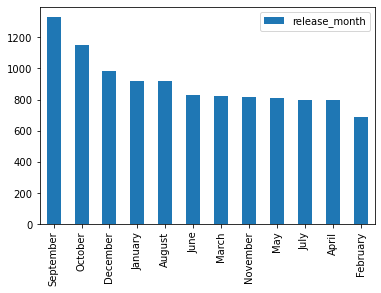

In [78]:
new['release_month'].value_counts().to_frame().plot(kind = "bar")

(d) To avoid code repetition, I will create a function that will allow me to plot pie charts to analyze the diffrent variables

In [79]:
def pie_chart(dataframe):
    x = input("Values to be plotted:")
    y = input("Title of the plot:")
    return px.pie(dataframe, names = dataframe.index, values = x, title = y)

(e) Checking the average runtime per month

In [80]:
pie_chart(new_m)

Values to be plotted:runtime
Title of the plot:Average Movie Runtime per Month


(f) Checking the average movie popularity per month

In [81]:
pie_chart(new_m)

Values to be plotted:popularity
Title of the plot:Average Movie Popularity per Month


(g) Checking the average movie budget per month

In [82]:
pie_chart(new_m)

Values to be plotted:budget
Title of the plot:Average Movie Budget per Month


(h) Checking the average movie budget per month

In [83]:
pie_chart(new_m)

Values to be plotted:revenue
Title of the plot:Average Movie Revenue per Month


(i) Here I will use a scatter plot to visualize budget against revenue, since there is a similarity in their individual pie charts. The plot shows us that there seems to be a positive correlation between these two variables, such that when one increases there is a corresponding increase in the other.

<AxesSubplot:xlabel='revenue', ylabel='budget'>

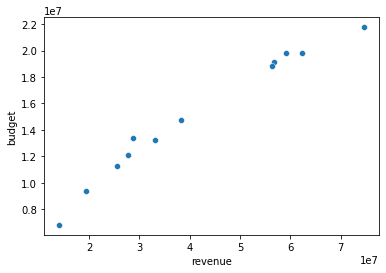

In [84]:
sns.scatterplot(x="revenue", y="budget", data = new_m)

(j) Confirming the correlation matrix between the two variables

In [85]:
new_m[['revenue','budget']].corr()

,revenue,budget
revenue,1.000000,0.985074
budget,0.985074,1.000000


(k) Checking the average movie vote count per month

In [86]:
pie_chart(new_m)

Values to be plotted:vote_count
Title of the plot:Average Movie Vote Count per Month


### Q2: What movie genres received the highest average rating?

(a) Grouping data by genre and sorting according to vote average

In [87]:
new_g = new.groupby('genres').mean().sort_values(by='vote_average', ascending=False)
new_g

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,
Drama|Horror|Mystery|Science Fiction|Thriller,0.129531,0.0,0.0,74.0,41.0,8.8,2014.0,0.000000e+00,0.000000e+00
Music|Drama|Fantasy|Romance,0.107333,0.0,0.0,27.0,24.0,8.4,2013.0,0.000000e+00,0.000000e+00
Thriller|Documentary,0.106091,0.0,0.0,96.0,19.0,8.2,2015.0,0.000000e+00,0.000000e+00
Science Fiction|Adventure|Family,0.056777,0.0,0.0,62.0,25.0,8.0,2009.0,0.000000e+00,0.000000e+00
History|Drama|Thriller|War,8.110711,14000000.0,233555708.0,113.0,3478.0,8.0,2014.0,1.289527e+07,2.151261e+08
...,...,...,...,...,...,...,...,...,...
Action|Family|Science Fiction,0.390228,0.0,0.0,67.0,14.0,3.1,2008.0,0.000000e+00,0.000000e+00
Fantasy|Drama|Horror|Action|Comedy,0.316955,0.0,0.0,94.0,10.0,3.1,1991.0,0.000000e+00,0.000000e+00
Drama|Horror|Comedy|Thriller|Science Fiction,0.073547,0.0,0.0,88.0,12.0,3.0,2005.0,0.000000e+00,0.000000e+00


(b) Plotting histograms to get a general overview of the variables

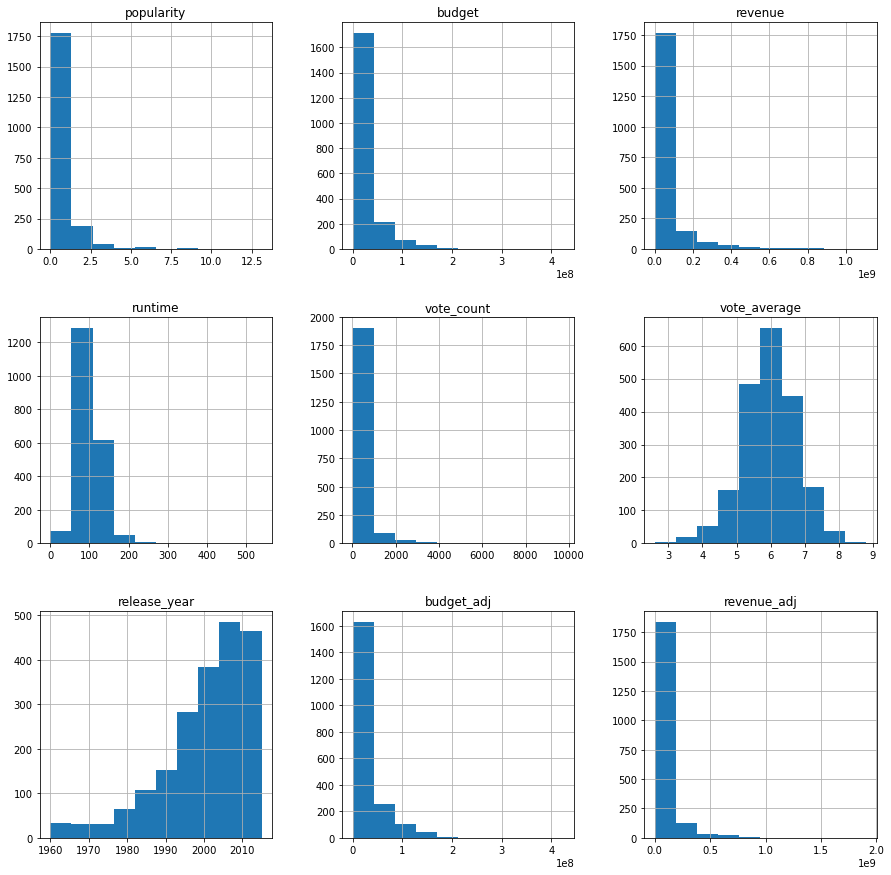

In [88]:
new_g.hist(figsize = (15,15));

(c) Loading the top 10 genres of the dataset so that I can analyze the data and search for any trends 

In [89]:
top_ten = new_g.iloc[:10,]
top_ten

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,
Drama|Horror|Mystery|Science Fiction|Thriller,0.129531,0.0,0.0,74.0,41.0,8.8,2014.0,0.000000e+00,0.000000e+00
Music|Drama|Fantasy|Romance,0.107333,0.0,0.0,27.0,24.0,8.4,2013.0,0.000000e+00,0.000000e+00
Thriller|Documentary,0.106091,0.0,0.0,96.0,19.0,8.2,2015.0,0.000000e+00,0.000000e+00
Science Fiction|Adventure|Family,0.056777,0.0,0.0,62.0,25.0,8.0,2009.0,0.000000e+00,0.000000e+00
History|Drama|Thriller|War,8.110711,14000000.0,233555708.0,113.0,3478.0,8.0,2014.0,1.289527e+07,2.151261e+08
Fantasy|Drama|Crime,2.719461,60000000.0,284600000.0,189.0,2299.0,8.0,1999.0,7.854317e+07,3.725564e+08
Mystery|Documentary|Crime,0.211124,0.0,0.0,103.0,54.0,8.0,1988.0,0.000000e+00,0.000000e+00
Romance|Comedy|Animation|Drama|Family,0.705700,0.0,0.0,6.0,318.0,8.0,2014.0,0.000000e+00,0.000000e+00
Science Fiction|Adventure|Drama|Fantasy,0.178898,0.0,0.0,57.0,50.0,7.9,2014.0,0.000000e+00,0.000000e+00


(d) Checking the relationship between two variables within the dataset

In [90]:
top_ten.iloc[:10,].corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.766031,0.876914,0.558122,0.914860,-0.374426,0.086674,0.742413,0.849723
budget,0.766031,1.000000,0.980530,0.634693,0.951647,-0.336822,-0.090811,0.994228,0.984806
revenue,0.876914,0.980530,1.000000,0.646892,0.990083,-0.361138,-0.040574,0.968535,0.994444
runtime,0.558122,0.634693,0.646892,1.000000,0.576637,-0.261123,-0.455409,0.683873,0.695035
vote_count,0.914860,0.951647,0.990083,0.576637,1.000000,-0.362844,0.021515,0.926865,0.970736
vote_average,-0.374426,-0.336822,-0.361138,-0.261123,-0.362844,1.000000,0.278135,-0.340954,-0.364894
release_year,0.086674,-0.090811,-0.040574,-0.455409,0.021515,0.278135,1.000000,-0.133051,-0.084809
budget_adj,0.742413,0.994228,0.968535,0.683873,0.926865,-0.340954,-0.133051,1.000000,0.983893
revenue_adj,0.849723,0.984806,0.994444,0.695035,0.970736,-0.364894,-0.084809,0.983893,1.000000


(e) Plotting popularity per movie genre for the top 10 to get the rankings

In [91]:
pie_chart(top_ten)

Values to be plotted:popularity
Title of the plot:Average Popularity per Genre


(f) Plotting vote count per movie genre for the top ten

In [92]:
pie_chart(top_ten)

Values to be plotted:vote_count
Title of the plot:Average Vote Count per Genre


<a id='conclusions'></a>
## Conclusions

My findings in terms of month of release include:
>1. September, October and December generated the highest movie releases in total.
>2. December, September and November had the highest vote average in general.
>3. June, November and December have the highest average movie popularity ranking.
>4. June, May and December have both the highest average budget and revenue.
>5. June, May and July as having the highest average movie vote count.
>6.December, September and May as having the highest average movie runtimes.
>>From this we can conclude that in general the best month to release a movie would be December, because this month shows up in the top 3 of almost all categories of analysis.
>**Limitations**
>1. My analysis did not factor in directors/cast. It's possible to have the same genre produced by different directors and cast and have a variation in the quality of movie. 
>2. It is possible that a month like February has fewer movie releases because it has the shortest days in a year, which could directly influence the number of movies released
>3. The data does not consider only one movie release per day, per month. There could be several movies released in one day in a particular month, thus explaining why some months have higher movie releases.

My findings in terms of genres, having ranked them according to the vote average, are that:
>1. The genre with the highest average rating is Drama|Horror|Mystery|Science Fiction|Thriller.
>2. A majority of the movies with high ratings were released from the year 2000 onwards.
>3. The most popular movie genre is Action|Thriller|Science Fiction|Mystery|Adventure, and this is also the genre with the highest vote count in the top ten. 
>3. There is a positive relationship between the budget and revenue.

>**Limitations**
>1. My analysis focuses only on the top 10 movie genres in the data set, in terms of average vote rating. It is possible to have developed greater insights had more data been used in the analysis.
>2. Having a high vote rating does not necessarily mean that the movie was top rated. For some of the genres such as Action|Thriller|Science Fiction|Mystery|Adventure, there is a high vote count. It is possible that this genre received low ratings but had a few high outliers which brought up the mean rating.